# Лабораторна робота №7
## з дисципліни "Чисельні методи"

##### За темою: "Чисельні методи розв′язання завдання кошi для звичайних диференцiйних рiвнянь"

##### Виконав: студент групи КА-12 Гавлицький Іван
##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* придбання практичних навичок в чисельному інтегруванні звичайних диференційних рівнянь явними і неявними одно- і багатокроковими методами, дослідження впливу значення кроку обчислень на точність і збіжність розв’язання. Визначення можливості застосування засобів стандартних пакетів для отримання результатів.

## Варіант 38

##### 1. У відповідності до свого варіанту завдання спробувати з’ясувати, чи існує аналітичний розв’язок рівняння (табл. 1). В іншому випадку змінити вид функції, інтервал визначення або початкову умову. Внести інформацію про проведені зміни у звіт з лабораторної роботи. Обрати аналітичний розв’язок в якості еталона.

##### 2. Запропонувати розрахункову схему (схеми) розв’язання заданого диференційного рівняння явним однокроковим методом і знайти розв’язання для 10-20 розрахункових точок. У разі нестійкої поведінки розрахункового процесу можна задіяти процедуру зменшення кроку інтегрування або визначити максимально можливу довжину кроку для інтегрування явними методами, яка обумовлюється власними числами матриці Якобі.

##### 3. Виконати розв’язання заданого диференційного рівняння неявним методом типу Рунге-Кутти 2(3).

##### 4. Виконати розв’язання заданого диференційного рівняння неявним методом типу Рунге-Кутти 4(5).

##### 5. Порівняти покрокові похибки числових розв’язків, отриманих в п.2-4.

##### 6. Для кожного рівняння побудувати відповідні залежності аналітичного розв’язання (за наявності) і покрокових результатів за часом на одному графіку. Знайти величини розбіжностей за множиною розрахункових точок.

##### 7. Погодити порядки точності одно- і багатокрокового методів і підготувати множину опорних точок для запуску процесу обчислень багатокроковими методами Мілна за схемою предиктор-коректор.

##### 8. Знайти чисельне розв’язання рівняння (табл. 1) багатокроковими методами Мілна, отримані результати подати у вигляді таблиці значень і за допомогою графіків.

##### 9. Використовуючи багатокрокові методи Адамса провести розрахунки, що дозволять оцінити похибки обчислень. Такі розрахунки можуть бути проведені із різними кроками інтегрування та/або методами з різними порядками.

##### 10. Провести порівняння отриманих розв’язків одно- і багатокроковими методами. Зробити висновки щодо трудомісткості, кількості кроків, точності отриманих розв’язань.

<center> <img src=https://i.imgur.com/NijqAtE.png> </center>

In [1449]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

tt = sp.symbols('t')
yy = sp.Function('y')

t0, tk, y0 = 1, 2, 1

def func(t, y):
    return sp.log(2*t + 1)*sp.sin((y+2)/3)
func_vec = np.vectorize(func)

func(tt, yy(tt))

log(2*t + 1)*sin(y(t)/3 + 2/3)

### Спробуємо розв'язати дане диф. рівняння аналітично. Для цього скористаємося вбудованою функцією

In [1450]:
eq = sp.Eq(sp.Derivative(yy(tt), tt), func(tt, yy(tt)))
res = sp.dsolve(eq, yy(tt), ics={yy(t0): y0})

res

Eq(y(t), 6*atan(sqrt(3)*(2*t + 1)**(1/6)*exp(1/3)*exp(t*(log(2*t + 1) - 1)/3)*tan(1/2)/3) - 2)

##### Як бачимо, рівняння розв'язується аналітично і не потребує змін виду функції, інтервалу визначення або початкової умови

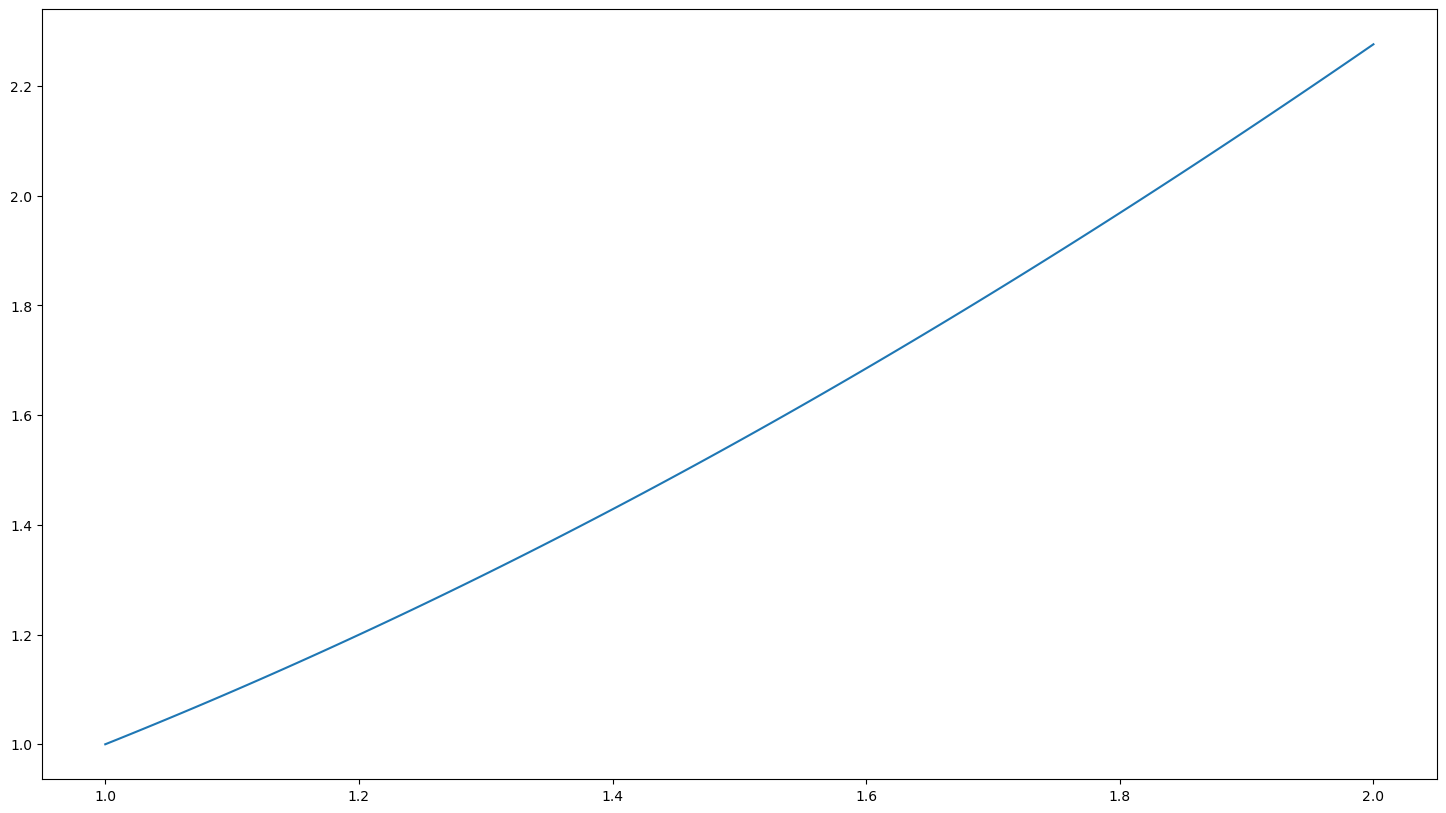

In [1451]:
res = sp.lambdify(tt, res.rhs)
y_func = np.vectorize(res)

T_etalon = np.linspace(t0, tk, 100)
y_etalon = y_func(T_etalon)

plt.subplots(1, 1, figsize = (18, 10))
plt.plot(T_etalon, y_etalon)
plt.show()

In [1452]:
def print_points(t_set, y_set):
    for t, y in zip(t_set, y_set):
        print(f't = {round(t, 1)}, y = {y}')

### Створимо розрахункову схему для розв'язання даного рівняння

In [1453]:
def runge_kutta_4(y0, t_start, t_end, h):
    num_points = int((t_end - t_start) / h) + 1
    
    T = np.linspace(t_start, t_end, num_points)
    Y = np.zeros(num_points)
    
    Y[0] = y0
    
    for ii in range(num_points - 1):
        t = T[ii]
        y = Y[ii]
        
        k1 = h * func(t, y)
        k2 = h * func(t + h / 2, y + k1 / 2)
        k3 = h * func(t + h / 2, y + k2 / 2)
        k4 = h * func(t + h, y + k3)
        
        Y[ii + 1] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return T, Y

In [1454]:
T_1, Y_1 = runge_kutta_4(y0, t0, tk, 0.1)

print_points(T_1, Y_1)

t = 1.0, y = 1.0
t = 1.1, y = 1.0961495088017215
t = 1.2, y = 1.1996496934998455
t = 1.3, y = 1.3104106966909461
t = 1.4, y = 1.4283291724182634
t = 1.5, y = 1.5532763587763823
t = 1.6, y = 1.6850871150062623
t = 1.7, y = 1.8235499537567916
t = 1.8, y = 1.9683982384087433
t = 1.9, y = 2.1193028221700683
t = 2.0, y = 2.275866478080226


##### Знайдемо еталонний розв'язок

In [1455]:
y_etalon = y_func(T_1)
y_etalon

array([1.        , 1.09614952, 1.19964971, 1.31041072, 1.42832921,
       1.5532764 , 1.68508717, 1.82355002, 1.96839831, 2.1193029 ,
       2.27586657])

##### Отже запропонована метод розв'язує задачу Коші достатньо точно

### Розв'яжемо задане диференційне рівняння неявним методом типу Рунге-Кутти 2(3)

In [1456]:
def runge_kutta(s, y0, t_start, t_end, h):
    c = np.linspace(0, 1, s+2)[1:-1]
    # c = np.array([1/3, 1])

    A, b = get_butcher_matrices(c)

    num_points = int((t_end - t_start) / h) + 1
    T = np.linspace(t_start, t_end, num_points)

    Y = np.zeros(num_points)
    Y[0] = y0

    for ii in range(num_points - 1):
        u = np.full(c.shape, Y[ii])

        F = getF(u, c, A, T[ii], h)
        Y[ii+1] = Y[ii] + h * b.dot(F)

    return T, Y


def getF(u, c, A, t, h):
    for ii in range(c.size):
        F = func_vec(t + c*h, u)
        u = u + h*np.sum(A*F.reshape((F.size, 1)), axis=0)
    return F


def get_butcher_matrices(c):
    s = c.size
    tt = sp.symbols('t')

    A = np.zeros((s, s))
    b = np.zeros(s)

    for jj in range(s):
        l_pol = get_lagrange_pol(tt, c, jj)
        b[jj] = sp.integrate(l_pol, (tt, 0, 1))

        for ii in range(s):
            A[ii, jj] = sp.integrate(l_pol, (tt, 0, c[ii]))

    return A, b


def get_lagrange_pol(tt, c, ii):
    temp = [jj for jj in range(c.size) if jj != ii]
    return np.prod((tt - c[temp])/(c[ii] - c[temp]))

In [1457]:
T_2, Y_2 = runge_kutta(2, y0, t0, tk, 0.1)

print_points(T_2, Y_2)

t = 1.0, y = 1.0
t = 1.1, y = 1.0961266830722827
t = 1.2, y = 1.199598207428188
t = 1.3, y = 1.3103244615358987
t = 1.4, y = 1.428201851768491
t = 1.5, y = 1.5531014008210344
t = 1.6, y = 1.6848578100486606
t = 1.7, y = 1.8232595167535128
t = 1.8, y = 1.9680399160324846
t = 1.9, y = 2.118870023076974
t = 2.0, y = 2.2753529237954235


### Розв'яжемо задане диференційне рівняння неявним методом типу Рунге - Кутти 4(5)

In [1458]:
T_3, Y_3 = runge_kutta(4, y0, t0, tk, 0.1)

print_points(T_3, Y_3)

t = 1.0, y = 1.0
t = 1.1, y = 1.09911480299878
t = 1.2, y = 1.205718878231214
t = 1.3, y = 1.3196230801139213
t = 1.4, y = 1.440606468251628
t = 1.5, y = 1.568405386392698
t = 1.6, y = 1.7027047243868731
t = 1.7, y = 1.84313157891322
t = 1.8, y = 1.9892515607178105
t = 1.9, y = 2.1405679581701635
t = 2.0, y = 2.2965238666992973


### Порівняємо розв'язки з пунктів 2-4 з еталонним

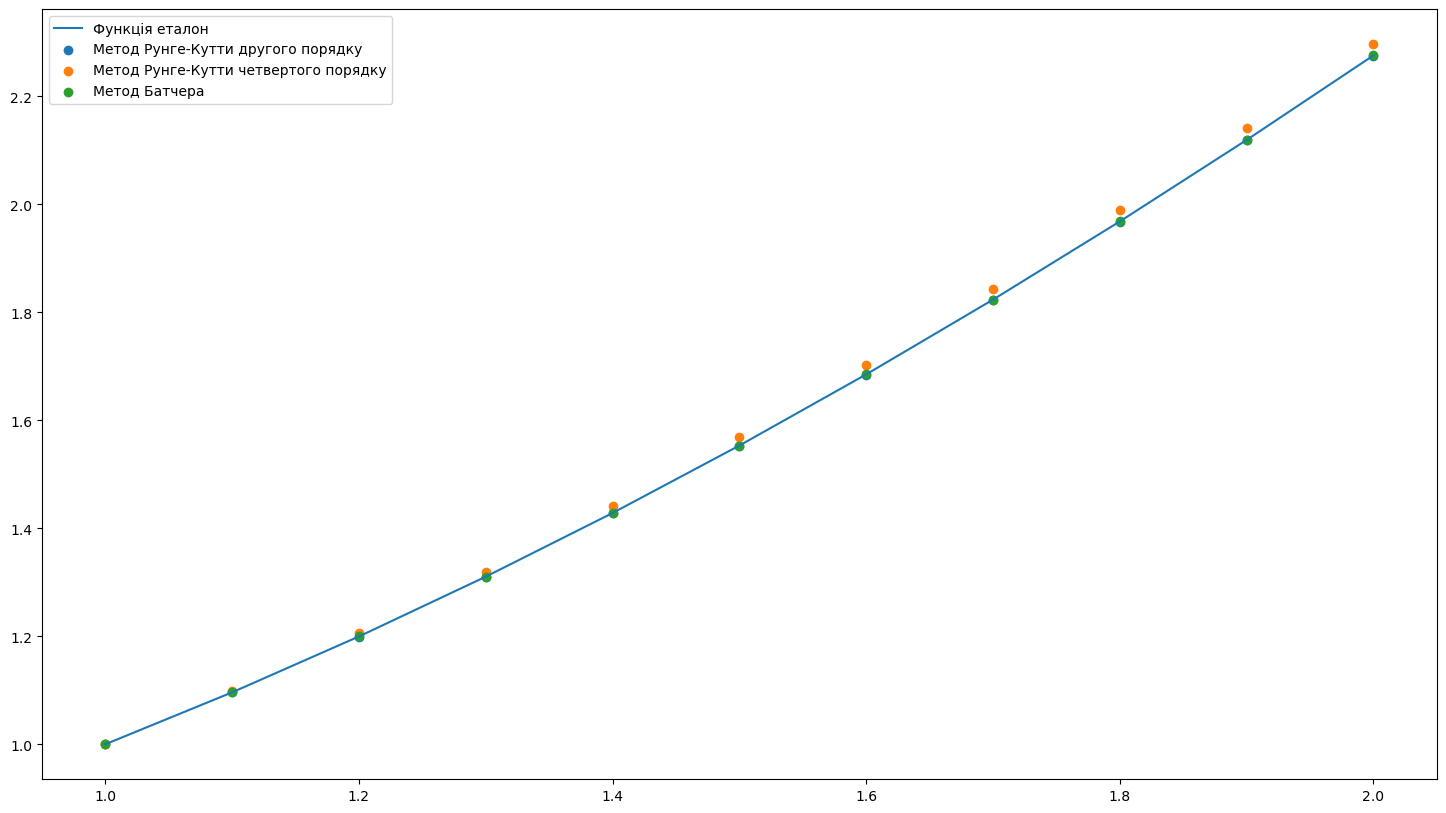

In [1459]:
plt.subplots(1, 1, figsize = (18, 10))
plt.plot(T_1, y_etalon, label = 'Функція еталон')
plt.scatter(T_2, Y_2, label = 'Метод Рунге-Кутти другого порядку')
plt.scatter(T_3, Y_3, label = 'Метод Рунге-Кутти четвертого порядку')
plt.scatter(T_1, Y_1, label = 'Метод Батчера')
plt.legend()
plt.show()

##### Графік розбіжностей

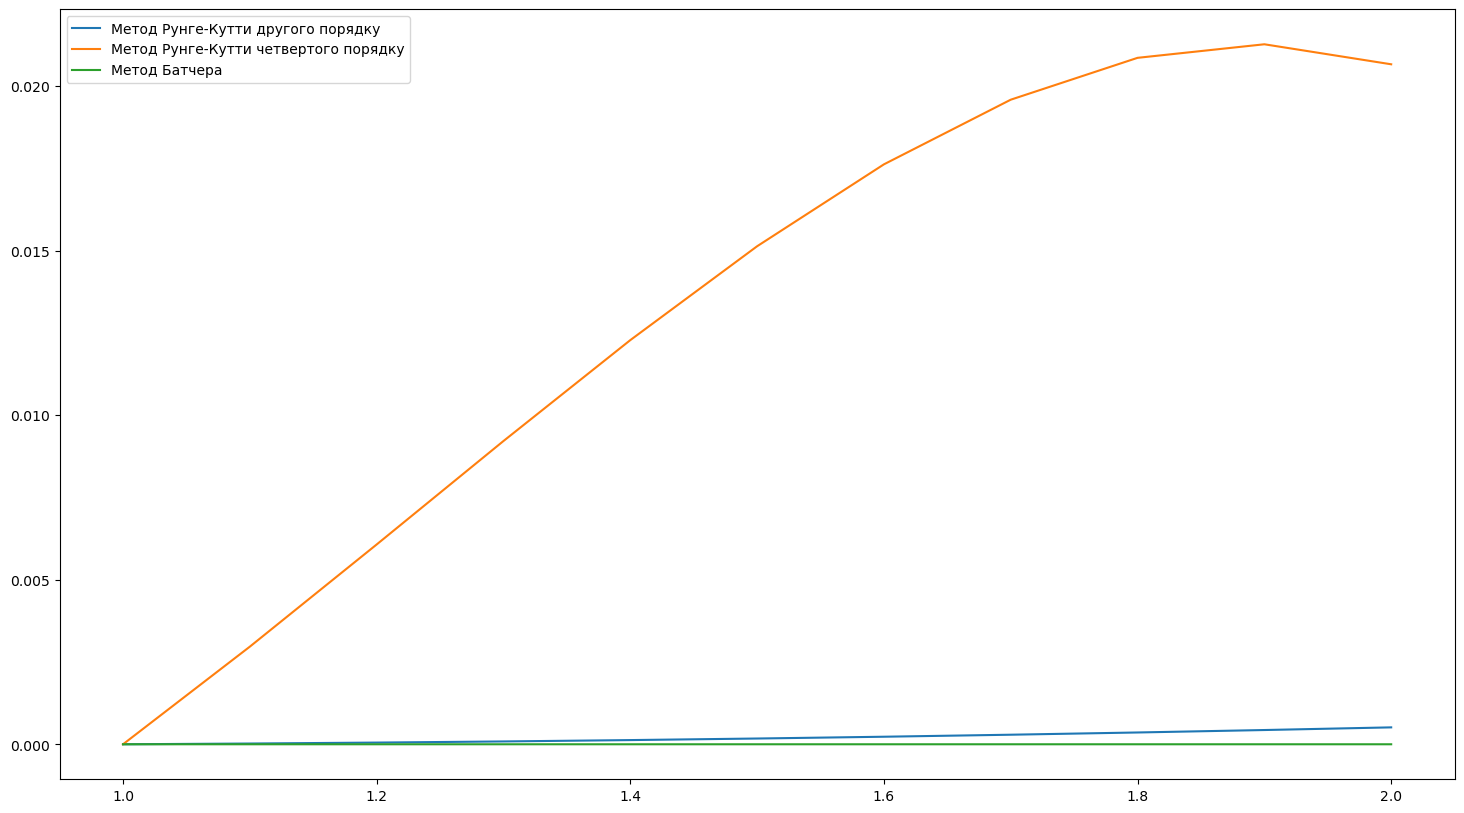

In [1460]:
plt.subplots(1, 1, figsize = (18, 10))
plt.plot(T_2, abs(Y_2 - y_etalon), label = 'Метод Рунге-Кутти другого порядку')
plt.plot(T_3, abs(Y_3 - y_etalon), label = 'Метод Рунге-Кутти четвертого порядку')
plt.plot(T_1, abs(Y_1 - y_etalon), label = 'Метод Батчера')
plt.legend()
plt.show()

### Реалізуємо багатокроковий метод Мілна за схемою предиктор-коректор

In [1461]:
def milne_method(y0, t_start, t_end, h):
    num_points = int((t_end - t_start) / h) + 1
    T = np.linspace(t_start, t_end, num_points)
    Y = np.zeros(num_points)

    Y[0:4] = y_etalon[0:4]

    for ii in range(3, num_points-1):
        temp = 2*func(T[ii-2], Y[ii-2]) - func(T[ii-1], Y[ii-1]) + 2*func(T[ii], Y[ii])
        y_pred = Y[ii-3] + 4/3*h*temp

        temp = func(T[ii-1], Y[ii-1]) - 4*func(T[ii], Y[ii]) + func(T[ii+1], y_pred)
        y_corr = Y[ii-2] + h/3*temp

        Y[ii+1] = y_pred

    return T, Y

In [1462]:
T_5, Y_5 = milne_method(y0, t0, tk, 0.1)

print_points(T_5, Y_5)

print(y_etalon)

t = 1.0, y = 1.0
t = 1.1, y = 1.0961495177963267
t = 1.2, y = 1.1996497113645805
t = 1.3, y = 1.3104107234471059
t = 1.4, y = 1.4283330767098865
t = 1.5, y = 1.5532801519361983
t = 1.6, y = 1.6850905101344293
t = 1.7, y = 1.823553197269086
t = 1.8, y = 1.9684049376162849
t = 1.9, y = 2.119308988150593
t = 2.0, y = 2.2758715053094236
[1.         1.09614952 1.19964971 1.31041072 1.42832921 1.5532764
 1.68508717 1.82355002 1.96839831 2.1193029  2.27586657]


### Реалізуємо багатокроковий метод Адамса

In [1463]:
def adams_method(y0, t_start, t_end, h):
    num_points = int((t_end - t_start) / h) + 1
    T = np.linspace(t_start, t_end, num_points)
    Y = np.zeros(num_points)
    
    Y[0:4] = y_etalon[0:4]
    
    for ii in range(2, num_points):
        y_pred = Y[ii - 1] + h / 2 * (3*func(T[ii - 1], Y[ii - 1]) - func(T[ii - 2], Y[ii - 2]))

        y_corr = Y[ii - 1] + h / 2 * (func(T[ii], y_pred) + func(T[ii - 1], Y[ii - 1]))

        Y[ii] = y_corr

    return T, Y

In [1464]:
T_6, Y_6 = adams_method(y0, t0, tk, 0.1)

print_points(T_6, Y_6)

t = 1.0, y = 1.0
t = 1.1, y = 1.0961495177963267
t = 1.2, y = 1.199642689147546
t = 1.3, y = 1.310395422269916
t = 1.4, y = 1.428303405155701
t = 1.5, y = 1.5532369672663684
t = 1.6, y = 1.685030124888794
t = 1.7, y = 1.8234706351096568
t = 1.8, y = 1.9682912265131884
t = 1.9, y = 2.1191622804100385
t = 2.0, y = 2.275686307930878


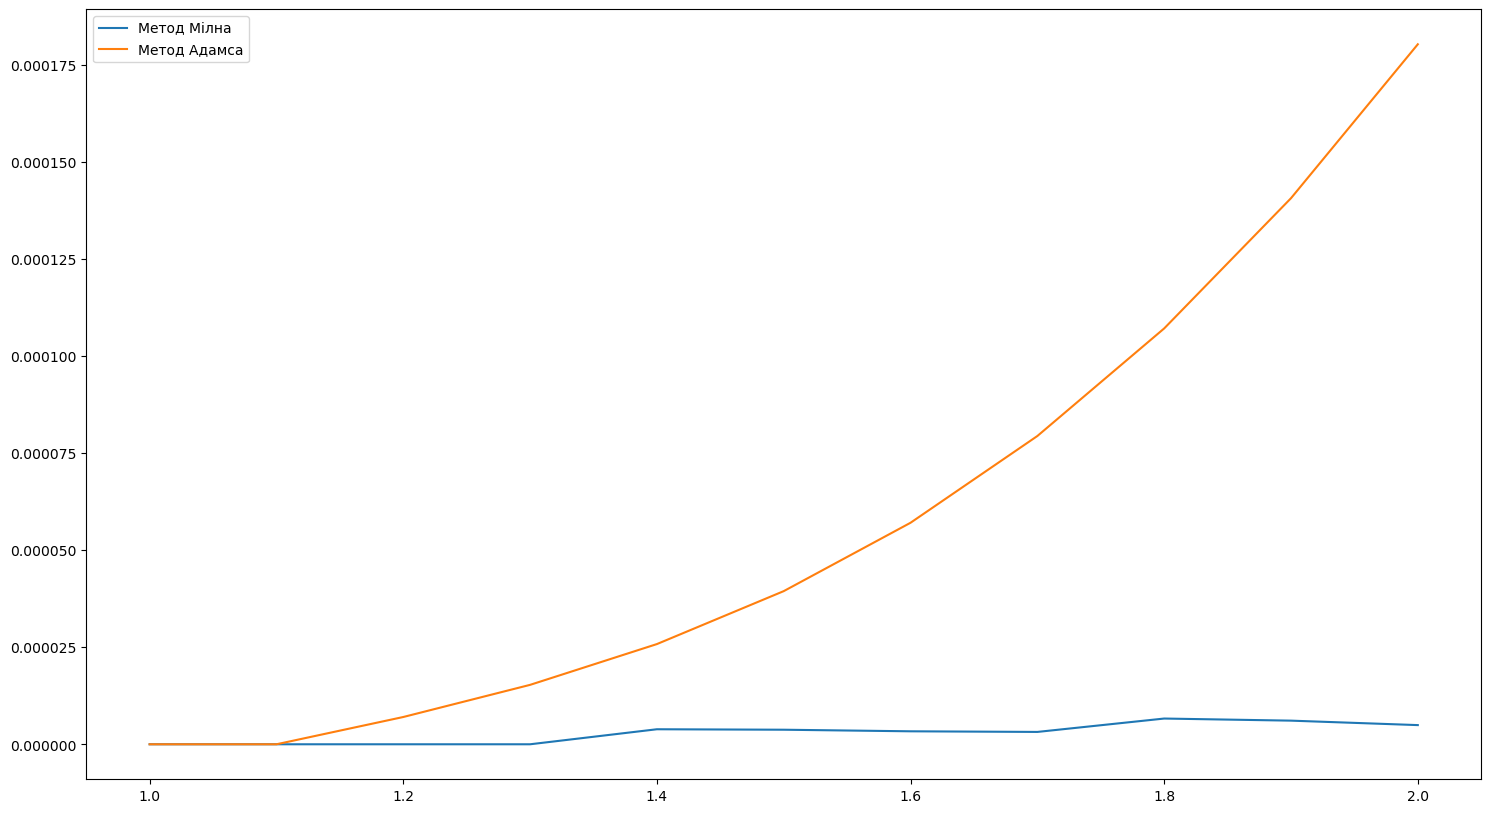

In [1465]:
plt.subplots(1, 1, figsize = (18, 10))
plt.plot(T_5, abs(Y_5 - y_etalon), label = 'Метод Мілна')
plt.plot(T_6, abs(Y_6 - y_etalon), label = 'Метод Адамса')
plt.legend()
plt.show()

## Висновки

##### Багатокрокові методи можуть бути трохи більш трудомісткими, вимагати зберігання попередніх значень та додаткових обчислень для прогнозування та виправлення. Кількість кроків у багатокрокових методах може залежати від умови зупинки, що може впливати на швидкість обчислень. Багатокрокові методи зазвичай мають більшу точність порівняно з однокроковими методами, але точність залежить від розрядності методу та характеристик задачі. Оптимальний вибір методу залежить від балансу між цими факторами та вимогами задачі.

##### Під час виконання лабороторної роботи я придбав практичні навички в чисельному інтегруванні звичайних диференційних рівнянь явними і неявними одно- і багатокроковими методами, дослідив вплив значення кроку обчислень на точність і збіжність розв’язання. 